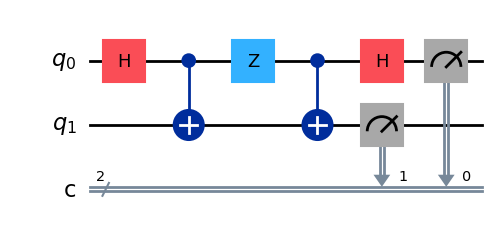

Decoded message = {'01': 1024}


In [2]:
# --- Superdense Coding (Qiskit 2.x) ---

from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# 2 qubits, 2 classical bits
# qubit 0 = Alice's qubit
# qubit 1 = Bob's qubit
qc = QuantumCircuit(2, 2)

# 1) Create an entangled Bell pair between Alice and Bob
qc.h(0)
qc.cx(0, 1)

# ---------------------------------
# ALICES PART (encoding her message)
# ---------------------------------

# Try ALL FOUR classical messages (00, 01, 10, 11)
# Change MESSAGE to encode different things

MESSAGE = "10"   # <-- change this to 00, 01, 10, 11

# Encoding rules:
if MESSAGE == "00":
    pass                    # do nothing
elif MESSAGE == "01":
    qc.x(0)                 # apply X gate
elif MESSAGE == "10":
    qc.z(0)                 # apply Z gate
elif MESSAGE == "11":
    qc.z(0); qc.x(0)        # apply Z then X

# Alice sends her qubit (qubit 0) to Bob

# ---------------------------
# BOBS PART (decoding message)
# ---------------------------
qc.cx(0, 1)
qc.h(0)

# Bob measures both qubits
qc.measure([0, 1], [0, 1])

# Draw the circuit
display(qc.draw('mpl'))
plt.show()

# Run on simulator
sim = Aer.get_backend("aer_simulator")
result = sim.run(qc, shots=1024).result()
counts = result.get_counts()

print("Decoded message =", counts)
plot_histogram(counts)
plt.show()